<a href="https://colab.research.google.com/github/annaho124/PMQ_using_ClassificationTree/blob/master/ClassificationTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading and Looking at Data

## 1.1 Import Modules

In [1]:
import pandas as pd #data handling
from random import sample
import matplotlib.pyplot as plt #visualization
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree, classificationSummary

## 1.2 Import dataset

In [2]:
training_df = pd.read_csv('training_dataXY.csv')
training_df = training_df.drop(columns=['YYYY','MM','DD','HH'])
training_df.head()

AH_hour   H_hour  T1_hour  T2_hour  T3_hour  T4_hour  T5_hour  quality
0     7.90  156.446  283.500  335.633  569.317  350.917  234.950      392
1     6.96  156.000  257.050  334.367  526.683  357.833  237.983      384
2     7.29  156.047  244.217  325.633  500.233  357.217  248.883      393
3     7.11  188.482  242.700  320.167  519.733  352.583  256.000      399
4     7.97  194.081  231.050  318.850  511.933  351.817  267.900      400

In [3]:
test_df = pd.read_csv('test_dataXY.csv')
test_df = test_df.drop(columns=['YYYY','MM','DD','HH'])
test_df.head()

AH_hour   H_hour  T1_hour  T2_hour  T3_hour  T4_hour  T5_hour  quality
0     9.68  181.990  237.850  352.917  468.867  367.583  224.717      411
1     7.59  182.118  247.650  370.117  455.733  366.850  224.533      428
2     7.69  181.957  249.800  374.017  443.900  357.117  232.383      440
3     6.75  181.647  243.433  368.133  433.417  338.933  249.867      453
4     8.87  182.229  240.900  372.267  448.333  327.367  262.167      467

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AH_hour  3672 non-null   float64
 1   H_hour   3672 non-null   float64
 2   T1_hour  3672 non-null   float64
 3   T2_hour  3672 non-null   float64
 4   T3_hour  3672 non-null   float64
 5   T4_hour  3672 non-null   float64
 6   T5_hour  3672 non-null   float64
 7   quality  3672 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 229.6 KB


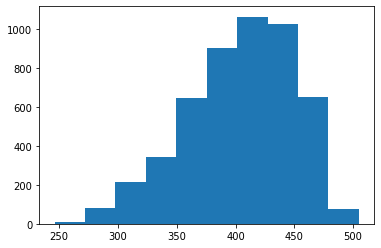

In [5]:
# Histogram for quality in training_df
plt.hist(training_df.quality)
plt.show()

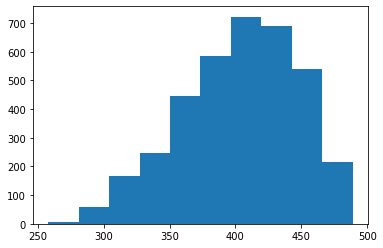

In [6]:
# Histogram for test_df quality
plt.hist(test_df.quality)
plt.show()

## 1.3 Convert Quality to Category variable using Control Chart in Quality Control

In [7]:
# Define a function to sample quality data
def sample_quality(df1, df2):
    df1_list = df1.quality.to_list()
    df2_list = df2.quality.to_list()
    sample_dict = {'sample_1':[], 'sample_2':[], 'sample_3':[], 'sample_4':[], 'sample_5':[]}
    for k in sample_dict.keys():
        sample_dict[k].extend(sample(df1_list, 24))
        sample_dict[k].extend(sample(df2_list, 12))
    sample_df = pd.DataFrame(sample_dict)
    return sample_df

In [8]:
sample_df = sample_quality(training_df, test_df)
sample_df.head()

sample_1  sample_2  sample_3  sample_4  sample_5
0       423       375       443       429       333
1       396       401       387       301       398
2       440       423       351       358       471
3       501       359       438       474       389
4       376       427       350       353       414

In [9]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sample_1  36 non-null     int64
 1   sample_2  36 non-null     int64
 2   sample_3  36 non-null     int64
 3   sample_4  36 non-null     int64
 4   sample_5  36 non-null     int64
dtypes: int64(5)
memory usage: 1.5 KB


In [10]:
sample_df = sample_df.assign(X_bar = lambda x: (x.sample_1 + x.sample_2 + x.sample_3 + x.sample_4 + x.sample_5)/5)
sample_df = sample_df.assign(R = lambda x: sample_df.max(axis=1) - sample_df.min(axis=1))
sample_df.head()

sample_1  sample_2  sample_3  sample_4  sample_5  X_bar      R
0       423       375       443       429       333  400.6  110.0
1       396       401       387       301       398  376.6  100.0
2       440       423       351       358       471  408.6  120.0
3       501       359       438       474       389  432.2  142.0
4       376       427       350       353       414  384.0   77.0

In [11]:
R_chart_df = pd.DataFrame({'R': sample_df.R,
                          'R_bar': [round(sample_df.R.mean(),2) for i in range(sample_df.shape[0])],
                          'UCL_R': [round(2.114*sample_df.R.mean(),2) for i in range(sample_df.shape[0])],
                          'LCL_R': [round(0*sample_df.R.mean(),2) for i in range(sample_df.shape[0])]})
R_chart_df.head()

R   R_bar   UCL_R  LCL_R
0  110.0  106.64  225.43    0.0
1  100.0  106.64  225.43    0.0
2  120.0  106.64  225.43    0.0
3  142.0  106.64  225.43    0.0
4   77.0  106.64  225.43    0.0

<AxesSubplot:>

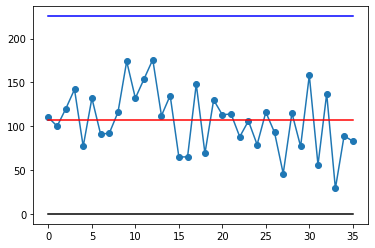

In [12]:
R_chart_df["R"].plot(marker="o")
R_chart_df["UCL_R"].plot(color='b')
R_chart_df["LCL_R"].plot(color='k')
R_chart_df["R_bar"].plot(color='r')

In [13]:
X_bar_chart_df = pd.DataFrame({'X_bar': sample_df.X_bar,
                               'X_bar2': [round(sample_df.X_bar.mean(),2) for i in range(sample_df.shape[0])],
                               'UCL_Xbar': [round(sample_df.X_bar.mean() + 0.577*sample_df.R.mean(),2) for i in range(sample_df.shape[0])],
                               'LCL_Xbar': [round(sample_df.X_bar.mean() - 0.577*sample_df.R.mean(),2) for i in range(sample_df.shape[0])]})
X_bar_chart_df.head()

X_bar  X_bar2  UCL_Xbar  LCL_Xbar
0  400.6  405.98    467.51    344.45
1  376.6  405.98    467.51    344.45
2  408.6  405.98    467.51    344.45
3  432.2  405.98    467.51    344.45
4  384.0  405.98    467.51    344.45

<AxesSubplot:>

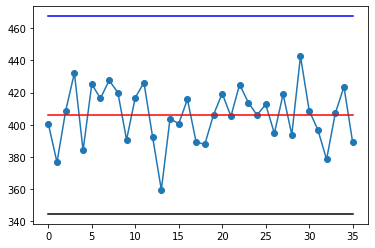

In [14]:
X_bar_chart_df['X_bar'].plot(marker="o")
X_bar_chart_df['UCL_Xbar'].plot(color='b')
X_bar_chart_df['LCL_Xbar'].plot(color='k')
X_bar_chart_df['X_bar2'].plot(color='r')

## Convert quality into 'good' and 'suspect' class

In [15]:
def convert(df):
    conditions = [
    (X_bar_chart_df.LCL_Xbar[0] <= df.quality) & (df.quality <= X_bar_chart_df.UCL_Xbar[0]),
    (df.quality > X_bar_chart_df.UCL_Xbar[0]) & (df.quality < X_bar_chart_df.LCL_Xbar[0])
    ]

    values = ['good','suspect']

    df['quality_class'] = np.select(conditions, values)
    return df

In [16]:
training_df = convert(training_df)
test_df = convert(test_df)

In [17]:
training_df.head()

AH_hour   H_hour  T1_hour  T2_hour  T3_hour  T4_hour  T5_hour  quality  \
0     7.90  156.446  283.500  335.633  569.317  350.917  234.950      392   
1     6.96  156.000  257.050  334.367  526.683  357.833  237.983      384   
2     7.29  156.047  244.217  325.633  500.233  357.217  248.883      393   
3     7.11  188.482  242.700  320.167  519.733  352.583  256.000      399   
4     7.97  194.081  231.050  318.850  511.933  351.817  267.900      400   

  quality_class  
0          good  
1          good  
2          good  
3          good  
4          good

In [19]:
training_df = training_df.drop(columns='quality')
test_df = test_df.drop(columns='quality')

# 2. Building classification tree model

## 2.1 Full-grown tree

In [20]:
classTree= DecisionTreeClassifier(random_state=0, max_depth=None)
classTree.fit(training_df.drop(columns=['quality_class']), training_df['quality_class'])
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=training_df.columns[:7], class_names= classTree.classes_)

Classes: 0, good


## 2.2 Confusion matrix for full-grown tree

In [21]:
classificationSummary(training_df['quality_class'], classTree.predict(training_df.drop(columns=['quality_class'])))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0  836    0
     1    0 4180


In [22]:
classificationSummary(test_df['quality_class'], classTree.predict(test_df.drop(columns=['quality_class'])))

Confusion Matrix (Accuracy 0.8429)

       Prediction
Actual    0    1
     0  270  308
     1  269 2825


## 2.3 Fine-tuned tree

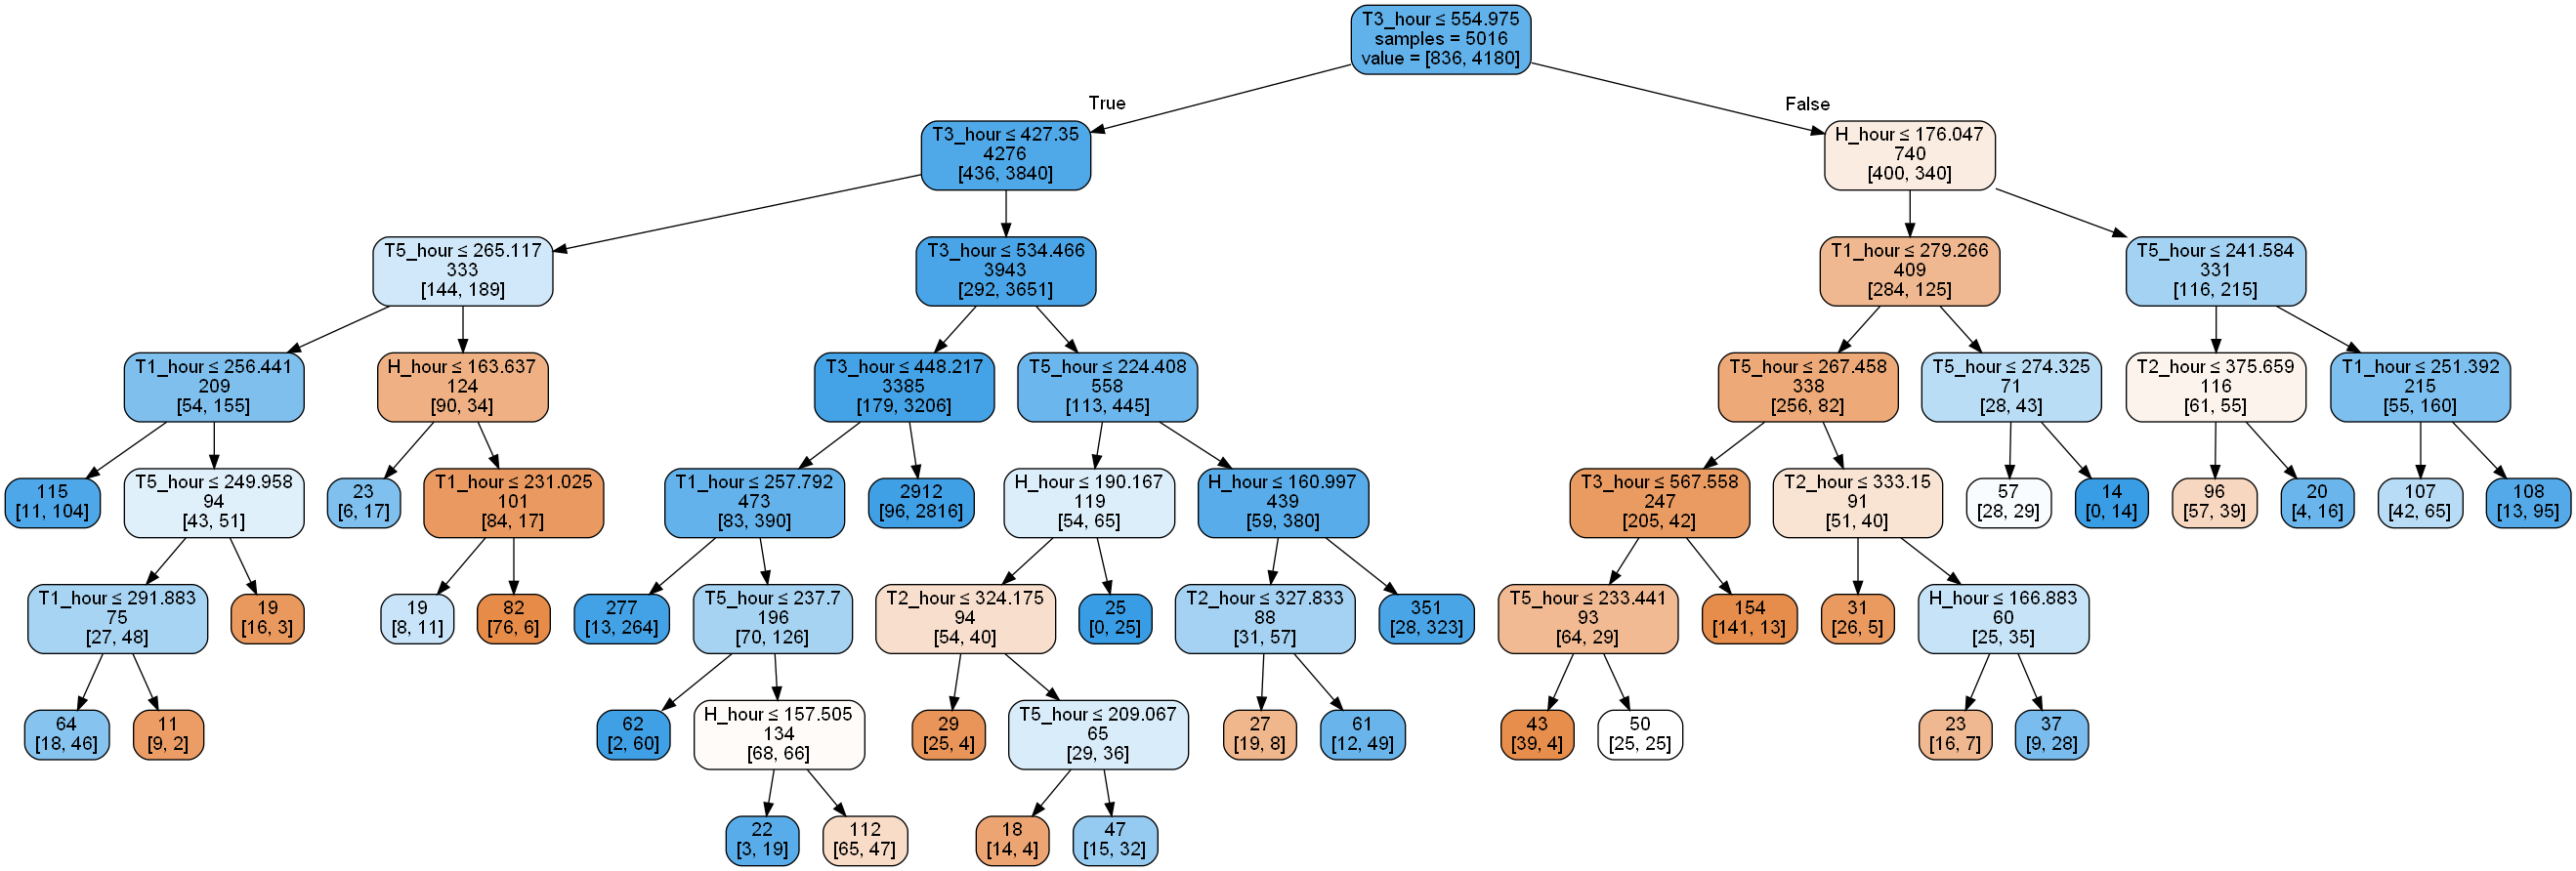

In [24]:
smallClassTree= DecisionTreeClassifier(max_depth= 100, min_samples_split= 40, min_impurity_decrease= 0.001, random_state= 1)
smallClassTree.fit(training_df.drop(columns = ['quality_class']), training_df['quality_class'])
plotDecisionTree(smallClassTree, feature_names=training_df.columns[:7])

## 2.4 Confusion Matrix for fine-tuned tree

In [25]:
classificationSummary(training_df['quality_class'], smallClassTree.predict(training_df.drop(columns = ['quality_class'])))

Confusion Matrix (Accuracy 0.9053)

       Prediction
Actual    0    1
     0  528  308
     1  167 4013


In [26]:
classificationSummary(test_df['quality_class'], smallClassTree.predict(test_df.drop(columns = ['quality_class'])))

Confusion Matrix (Accuracy 0.8671)

       Prediction
Actual    0    1
     0  271  307
     1  181 2913
